# DGGS for Mapping Calgary's Inequality

H3 is a geospatial indexing system using a hexagonal grid that can be (approximately) subdivided into finer and finer hexagonal grids. One of the applications of hexagons is to be able to combine different datasets with different geographic shapes and forms, to a common reference system. This way the data is ready for analysis.

Through this notebook we are going to use the H3 library to convert Geospatial data stored in our ArcGIS account into a DGGS system

In [1]:
from geopandas import read_file

## Reading wards Feature class from file

In [2]:
import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor

data = './data/Census_by_ward_final.shp'

sdf = pd.DataFrame.spatial.from_featureclass(data)

sdf

,FID,Ward,Resident,Male,Female,Dwelling,Household,Employed,Pre_school,Ownership,...,Family,Refugees,Other,Top1_Count,Top2_Count,Top3_Count,Top4_Count,Top5_Count,Avg_income,SHAPE
0,0,WARD 11,82636.0,40280.0,42356.0,36800.0,45465.0,42125.0,5902,22800.0,...,3945,2055.0,190,Philippines,United Kingdom,China,United States,India,73171.796875,"{""rings"": [[[-114.11815449933067, 51.023899160..."
1,1,WARD 9,76533.0,38922.0,37611.0,37174.0,37490.0,41935.0,5934,20182.0,...,7185,5200.0,155,Philippines,Viet Nam,United Kingdom,China,Ethiopia,45782.000000,"{""rings"": [[[-114.04828320810356, 51.084967480..."
2,2,WARD 2,94011.0,47052.0,46959.0,32970.0,27355.0,47733.0,8566,26941.0,...,6610,2545.0,330,China,India,Philippines,Hong Kong,Pakistan,46090.800781,"{""rings"": [[[-114.09457382562152, 51.197010129..."
3,3,WARD 1,87565.0,43306.0,44259.0,34063.0,33570.0,42282.0,6628,24113.0,...,3765,1435.0,145,China,United Kingdom,Philippines,India,United States,61786.000000,"{""rings"": [[[-114.2486183805338, 51.1542194521..."
4,4,WARD 8,86454.0,44482.0,41972.0,54490.0,43975.0,55614.0,5474,17755.0,...,3765,3430.0,115,Philippines,United Kingdom,China,India,Ethiopia,64864.699219,"{""rings"": [[[-114.17248939696805, 51.069554937..."
5,5,WARD 4,85707.0,43111.0,42596.0,33152.0,38530.0,43914.0,6122,22906.0,...,6515,2910.0,160,China,Hong Kong,Philippines,United Kingdom,India,57275.398438,"{""rings"": [[[-114.10008184220322, 51.153970607..."
6,6,WARD 14,80409.0,40151.0,40258.0,30920.0,31670.0,41096.0,6238,24742.0,...,3265,1490.0,55,United Kingdom,Philippines,China,India,United States,66163.500000,"{""rings"": [[[-114.0242432803031, 50.9640678158..."
7,7,WARD 7,84171.0,43164.0,41007.0,41862.0,32245.0,43135.0,5454,19610.0,...,3270,1250.0,135,China,United Kingdom,Philippines,United States,Hong Kong,51100.000000,"{""rings"": [[[-114.09508152978873, 51.089668668..."
8,8,WARD 13,83583.0,41512.0,42071.0,30234.0,32110.0,43130.0,6469,24451.0,...,5535,2690.0,280,Philippines,China,India,United Kingdom,Russian Federation,57380.398438,"{""rings"": [[[-114.11035243721517, 50.950517816..."
9,9,WARD 12,109384.0,54604.0,54780.0,40632.0,34865.0,60166.0,12999,33091.0,...,4960,2555.0,125,Philippines,United Kingdom,India,China,United States,49445.500000,"{""rings"": [[[-113.8694465378274, 50.9795698373..."


In [3]:
from arcgis.gis import GIS
    
# connect as an anonymous user
gis = GIS("https://ucalgary.maps.arcgis.com", username="mingke.li_ucalgary")

user = gis.users.get('mingke.li_ucalgary')

Enter password: ········


In [4]:
sdf[['Immigrant', 'SHAPE']].head()

,Immigrant,SHAPE
0,16630.0,"{""rings"": [[[-114.11815449933067, 51.023899160..."
1,20590.0,"{""rings"": [[[-114.04828320810356, 51.084967480..."
2,28135.0,"{""rings"": [[[-114.09457382562152, 51.197010129..."
3,17535.0,"{""rings"": [[[-114.2486183805338, 51.1542194521..."
4,17965.0,"{""rings"": [[[-114.17248939696805, 51.069554937..."


In [5]:
m1 = GIS().map("Calgary")
m1

MapView(layout=Layout(height='400px', width='100%'))

In [42]:
#sdf.spatial.plot(map_widget=m1,
 #                          renderer_type='s',
  #                         cmap = 'RdPu',  # use a red to purple color map
   #                        symbol_type='simple',
    #                       symbol_style='s',
     #                      outline_style='s',
      #                     outline_color=[0,0,0,255],
       #                    line_width=1.0)

In [6]:
sdf.spatial.sr

{'wkt': 'GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["degree",0.0174532925199433]]'}

In [7]:
sdf.spatial.plot(map_widget=m1,
               renderer_type='c',  # for class breaks renderer
               method='esriClassifyNaturalBreaks',  # classification algorithm
               class_count=20,  # choose the number of classes
               col='Immigrant',  # numeric column to classify
               cmap='prism',  # color map to pick colors from for each class
               alpha=0.7  # specify opacity
               )

True

In [8]:
class_breaks = m1.layers[0].layer.layerDefinition.drawingInfo.renderer.classBreakInfos

cbs_list = []
cmap_list = []
for cb in class_breaks:
    print(cb.description)  # print the class break labels
    cbs_list.append(cb.classMaxValue)
    cmap_list.append([x/255.0 for x in cb.symbol.color])

10835.0 - 12708.421052631578
12708.421052631578 - 14581.842105263158
14581.842105263158 - 16455.263157894737
16455.263157894737 - 18328.684210526317
18328.684210526317 - 20202.105263157893
20202.105263157893 - 22075.526315789473
22075.526315789473 - 23948.947368421053
23948.947368421053 - 25822.368421052633
25822.368421052633 - 27695.78947368421
27695.78947368421 - 29569.21052631579
29569.21052631579 - 31442.63157894737
31442.63157894737 - 33316.05263157895
33316.05263157895 - 35189.47368421053
35189.47368421053 - 37062.89473684211
37062.89473684211 - 38936.31578947368
38936.31578947368 - 40809.73684210527
40809.73684210527 - 42683.15789473684
42683.15789473684 - 44556.57894736842
44556.57894736842 - 46430.0
46430.0 - 46430.0


Text(0.5, 1.0, 'Histogram of Inmigrant column')

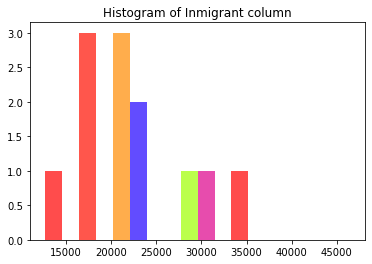

In [9]:
import matplotlib.pyplot as plt
# build a histogram for the same class breaks
n, bins, patches = plt.hist(sdf['Immigrant'], bins=cbs_list)

# apply the same color for each class to match the map
idx = 0
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cmap_list[idx])
    idx+=1

plt.title('Histogram of Inmigrant column')

#### To Feature Class

In [11]:
fclass=sdf.spatial.to_featureclass("./data/census_by_ward")

ExecuteError: ERROR 000258: Output C:\Users\mpr_1\OneDrive\Documentos\Marta2021\EsriApp-Challenge2021\gitRepository\ECCE-App-Challenge-2021-UCalgary\notebooks\data\census_by_ward.shp already exists
Failed to execute (CreateFeatureclass).


#### To Feature Layer

In [11]:
item = gis.content.import_data(df=sdf, title="CesusTest2", folder="test")

In [12]:
item

<Item title:"CesusTest2" type:Feature Layer Collection owner:mingke.li_ucalgary>

In [13]:
flyr=item.layers[0]

## Wards Polygons to Hexagons

Create a GeoDataFrame from Shapefile

In [10]:
from geopandas import read_file 

# Define the URL
data = "./data/Census_by_ward_final.shp"

# Read file from URL
gdf = read_file(data)

Define a list of resolutions to generate a layer of hexagons per resolution

In [12]:
resolutions=[5,6,7,8,9,10]

Define helper function: plot

In [13]:
#Functions
def plot_scatter(df, metric_col, x='lng', y='lat', marker='.', alpha=1, figsize=(16,12), colormap='viridis'):    
    df.plot.scatter(x=x, y=y, c=metric_col, title=metric_col
                    , edgecolors='none', colormap=colormap, marker=marker, alpha=alpha, figsize=figsize);
    plt.xticks([], []); plt.yticks([], [])

Define the calculate hexagons function

In [14]:
import geopandas
from shapely.geometry import mapping
from shapely.ops import cascaded_union#, unary_union
import matplotlib.pyplot as plt
import h3

def calc_hex(res,gdf):

    # Unify the polygons
    union_poly = cascaded_union(gdf.geometry)
    
    # Find the hexs within the ward boundaries using PolyFill
    hex_list=[]

    temp  = mapping(union_poly)
    temp['coordinates']=[[[j[1],j[0]] for j in i] for i in temp['coordinates']]  
    hex_list.extend(h3.polyfill(temp,res))

    # create hex dataframe
    hex_col = 'hex{}'.format(res)
    dfh = pd.DataFrame(hex_list,columns=[hex_col])
    print('Sanity Check\nnumber of hexes:', len(hex_list))
    print('number of duplicates:', len(hex_list) - len(dfh.drop_duplicates()))

    # add lat & lng of center of hex 
    dfh['lat']=dfh[hex_col].apply(lambda x: h3.h3_to_geo(x)[0])
    dfh['lng']=dfh[hex_col].apply(lambda x: h3.h3_to_geo(x)[1])
    
    #for g in gdf.columns:
       # print(g)

    # create Point object based on hex latlng
    gdf2 = geopandas.GeoDataFrame(
        dfh, geometry=geopandas.points_from_xy(dfh.lng, dfh.lat), crs="EPSG:4326")

    # Intersect Hex Point with Polygon
    df_ct = geopandas.tools.sjoin(gdf, gdf2, how="inner")
    
    df_ct.attrs['resolution'] = res
    # Visualize Hexagons
    #plot_scatter(df_ct, metric_col=metric, marker='.')
    #plt.title('hex-grid: inmigrants by ward');
    
    return df_ct

Calculate hexagons for every resolution

In [15]:
import pandas as pd

dfhs=[]
for res in resolutions:
    dfhs.append(calc_hex(res,gdf))

Sanity Check
number of hexes: 4
number of duplicates: 0
Sanity Check
number of hexes: 24
number of duplicates: 0
Sanity Check
number of hexes: 172
number of duplicates: 0
Sanity Check
number of hexes: 1202
number of duplicates: 0
Sanity Check
number of hexes: 8417
number of duplicates: 0
Sanity Check
number of hexes: 58899
number of duplicates: 0


In [16]:
import geopandas
from shapely.geometry import mapping
from shapely.ops import cascaded_union#, unary_union
import matplotlib.pyplot as plt
import h3

def calc_hex_raster(res,df,col):

    hex_col = 'hex'+str(res)

    # find hexs containing the points
    df[hex_col] = df.apply(lambda x: h3.geo_to_h3(x.lat,x.lng,res),1)

    # calculate elevation average per hex
    df_dem = df.groupby(hex_col)[col].mean().to_frame(col).reset_index()

    #find center of hex for visualization
    df_dem['lat'] = df_dem[hex_col].apply(lambda x: h3.h3_to_geo(x)[0])
    df_dem['lng'] = df_dem[hex_col].apply(lambda x: h3.h3_to_geo(x)[1])
    
    df_dem.attrs['resolution'] = res
    
    return df_dem

    # pltot the hexs
    #plot_scatter(df_dem, metric_col='elevation', marker='o')
    #plt.title('hex-grid: elevation');

In [17]:
import os
import glob
import re

dictdems=[]

    # Visualize the elevation
    #plot_scatter(df, metric_col='elevation', marker='.', colormap='gray')
dfdems=[]
for i in range(len(resolutions)):
    fileN=0
    for filepath in glob.glob(os.path.join('./data/raster/', '*.csv')):
        
        #Define column names
        col=filepath.split("\\")[-1].split(".")[0]
        
        print(f"Calculating file {col} at {resolutions[i]} resolution")
        
        # read xyz points
        df = pd.read_csv(filepath,sep=',',header=1,names=['lng','lat',col])
        
        if(fileN==0):
            dfu=calc_hex_raster(resolutions[i],df,col)
        else:
            dfu = dfu.merge(calc_hex_raster(resolutions[i],df,col))
            
        fileN += 1 
                            
    dfu.attrs['resolution'] = resolutions[i]
    dfdems.append(dfu)
    
print(dfdems[0])

Calculating file Art_dis at 5 resolution
Calculating file Library_dis at 5 resolution
Calculating file Playground_dis at 5 resolution
Calculating file Recreation_dis at 5 resolution
Calculating file School_dis at 5 resolution
Calculating file Art_dis at 6 resolution
Calculating file Library_dis at 6 resolution
Calculating file Playground_dis at 6 resolution
Calculating file Recreation_dis at 6 resolution
Calculating file School_dis at 6 resolution
Calculating file Art_dis at 7 resolution
Calculating file Library_dis at 7 resolution
Calculating file Playground_dis at 7 resolution
Calculating file Recreation_dis at 7 resolution
Calculating file School_dis at 7 resolution
Calculating file Art_dis at 8 resolution
Calculating file Library_dis at 8 resolution
Calculating file Playground_dis at 8 resolution
Calculating file Recreation_dis at 8 resolution
Calculating file School_dis at 8 resolution
Calculating file Art_dis at 9 resolution
Calculating file Library_dis at 9 resolution
Calculatin

In [69]:
print(dfdems[1])

                hex7      Art_dis        lat         lng   Library_dis  \
0    8712c1a69ffffff  4876.859160  51.131200 -114.312741   7743.666096   
1    8712cc890ffffff  4132.135802  50.907825 -113.857079  13354.244019   
2    8712cc892ffffff  4693.626022  50.896063 -113.883948  12602.275919   
3    8712cc893ffffff  6129.301989  50.886213 -113.852780  14044.195891   
4    8712cc894ffffff  2814.042813  50.929440 -113.861383  12235.133755   
..               ...          ...        ...         ...           ...   
208  8712ea6f2ffffff  2958.059307  51.171106 -114.115594   3667.138149   
209  8712ea6f3ffffff  1225.017594  51.161332 -114.084193   1371.213630   
210  8712ea6f4ffffff  5298.320034  51.204606 -114.093106   5248.337883   
211  8712ea6f5ffffff  4049.638153  51.194826 -114.061678   4003.810486   
212  8712ea6f6ffffff  4633.423787  51.192740 -114.120066   5211.936307   

     Playground_dis  Recreation_dis   School_dis  
0       3373.987229     5159.788677  3735.997552  
1       3

### dfhs and dfdems

In [82]:
mergedDFs=[]
for i in range(len(resolutions)):
    mergeDF = dfhs[i].merge(dfdems[i])
    mergeDF.attrs['resolution'] = resolutions[i]
    mergedDFs.append(mergeDF)

In [74]:
print(mergedDFs[0])

       Ward  Resident     Male   Female  Dwelling  Household  Employed  \
0   WARD 11   82636.0  40280.0  42356.0   36800.0    45465.0   42125.0   
1    WARD 9   76533.0  38922.0  37611.0   37174.0    37490.0   41935.0   
2    WARD 9   76533.0  38922.0  37611.0   37174.0    37490.0   41935.0   
3    WARD 2   94011.0  47052.0  46959.0   32970.0    27355.0   47733.0   
4    WARD 1   87565.0  43306.0  44259.0   34063.0    33570.0   42282.0   
5    WARD 1   87565.0  43306.0  44259.0   34063.0    33570.0   42282.0   
6    WARD 1   87565.0  43306.0  44259.0   34063.0    33570.0   42282.0   
7    WARD 4   85707.0  43111.0  42596.0   33152.0    38530.0   43914.0   
8    WARD 4   85707.0  43111.0  42596.0   33152.0    38530.0   43914.0   
9   WARD 14   80409.0  40151.0  40258.0   30920.0    31670.0   41096.0   
10  WARD 14   80409.0  40151.0  40258.0   30920.0    31670.0   41096.0   
11  WARD 13   83583.0  41512.0  42071.0   30234.0    32110.0   43130.0   
12  WARD 13   83583.0  41512.0  42071.

Remove duplicates

In [83]:
results=[]
hexDFs=[]
for dfh in mergedDFs:
    hex_col = 'hex{}'.format(dfh.attrs['resolution'])
    hexDF=dfh.drop_duplicates(subset=[hex_col])
    hexDFs.append(hexDF)
    hexIds = [x for x in hexDF[hex_col]]
    result={
        'resolution':dfh.attrs['resolution'],
        'hexList':hexIds
    }
    results.append(result)

In [85]:
print(len(results))
print(hexDFs[1])

2
        Ward  Resident     Male   Female  Dwelling  Household  Employed  \
0    WARD 11   82636.0  40280.0  42356.0   36800.0    45465.0   42125.0   
1    WARD 11   82636.0  40280.0  42356.0   36800.0    45465.0   42125.0   
2    WARD 11   82636.0  40280.0  42356.0   36800.0    45465.0   42125.0   
3    WARD 11   82636.0  40280.0  42356.0   36800.0    45465.0   42125.0   
4    WARD 11   82636.0  40280.0  42356.0   36800.0    45465.0   42125.0   
..       ...       ...      ...      ...       ...        ...       ...   
167   WARD 5   96146.0  49034.0  47112.0   30676.0    22560.0   45757.0   
168   WARD 5   96146.0  49034.0  47112.0   30676.0    22560.0   45757.0   
169   WARD 5   96146.0  49034.0  47112.0   30676.0    22560.0   45757.0   
170   WARD 5   96146.0  49034.0  47112.0   30676.0    22560.0   45757.0   
171   WARD 5   96146.0  49034.0  47112.0   30676.0    22560.0   45757.0   

     Pre_school  Ownership  Age_0_4  ...  \
0          5902    22800.0     4887  ...   
1        

Generate hexagons actual geometry

In [86]:
from h3 import h3

def visualize_hexagons(hexagons, color="red"):
    """
    hexagons is a list of hexcluster. Each hexcluster is a list of hexagons. 
    eg. [[hex1, hex2], [hex3, hex4]]
    """
    polygons = []
    
    for hex in hexagons:
        polygons.append(h3.h3_set_to_multi_polygon([hex], geo_json=False))
        
    return polygons

In [87]:
hexagons=[]
for result in results:
    hexagons.append(visualize_hexagons(result['hexList']))

In [92]:
print(len(hexagons[1]))

172


Create polygons from list of coordinates

In [93]:
from shapely.geometry import Polygon

polLists=[]
for hexagon in hexagons:
    polList =[]
    for p in hexagon:
        for t in p:
            pol=[]
            for x in t:
                for c in x:
                    cc=(c[1],c[0])
                    pol.append(cc)
            polList.append(Polygon(pol))
    polLists.append(polList)

In [94]:
sdfs=[]
gdfHexs=[]
for i in range(len(polLists)):
    print(hexDFs[i].attrs)
    gdfHex = geopandas.GeoDataFrame(
    hexDFs[i], geometry=polLists[i], crs="EPSG:4326")
    gdfHexs.append(gdfHex)
    #gdfHex.plot()
    sdf=GeoAccessor.from_geodataframe(gdfHex)
    sdf.attrs=hexDFs[i].attrs
    sdfs.append(sdf)

{'resolution': 6}
{'resolution': 7}


Upload Hexagons Features to GIS and publish them

In [95]:
for sdf in sdfs:
    print(f"Uploading hexagons at level {sdf.attrs['resolution']}")
    gis.content.import_data(df=sdf, title=f"Hexagons{sdf.attrs['resolution']}", folder="test")
    print(f"Done with hexagons at level {sdf.attrs['resolution']}")

Uploading hexagons at level 6
Done with hexagons at level 6
Uploading hexagons at level 7
Done with hexagons at level 7


## Raster to Hex

          elevation         lng        lat
0       3216.434326 -114.209915  51.197613
1       3187.480713 -114.209228  51.197746
2       3235.720215 -114.211075  51.196911
3       3205.356445 -114.210388  51.197044
4       3175.502197 -114.209701  51.197178
...             ...         ...        ...
334315  4912.389160 -113.861839  50.857834
334316  4933.242188 -113.861153  50.857967
334317  4954.519043 -113.860474  50.858101
334318  4958.348145 -113.861626  50.857403
334319  4979.008789 -113.860947  50.857536

[334320 rows x 3 columns]


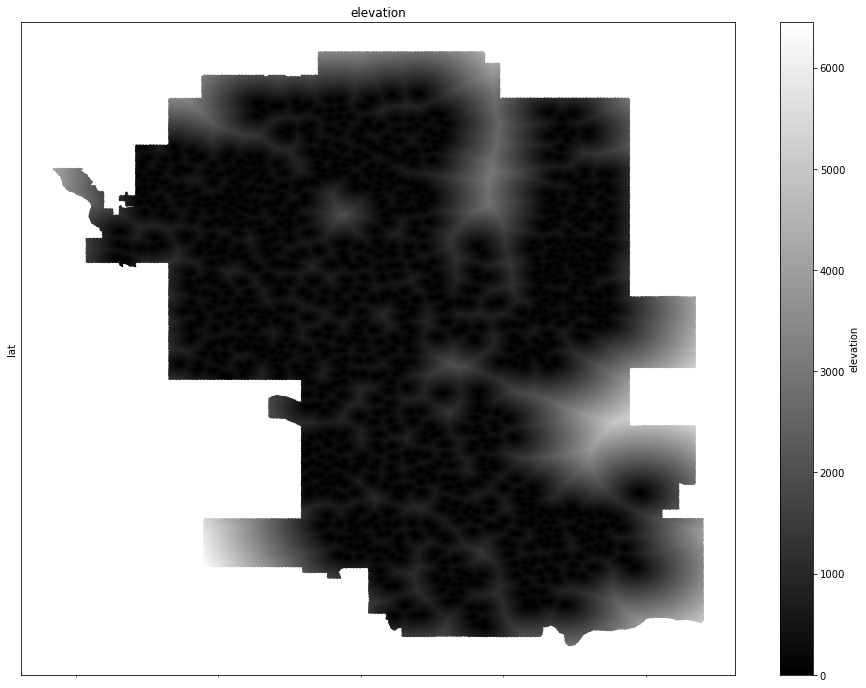

In [56]:
# read xyz points
df = pd.read_csv("./data/raster/Playground_dis.csv",sep=',',header=1,names=['elevation','lng','lat'])

# ignore the missing values
df = df[df.elevation>-1000]

print(df)
# Visualize the elevation
plot_scatter(df, metric_col='elevation', marker='.', colormap='gray')

In [ ]:
import geopandas
from shapely.geometry import mapping
from shapely.ops import cascaded_union#, unary_union
import matplotlib.pyplot as plt
import h3

def calc_hex(res,gdf,metric):

    # Unify the polygons
    union_poly = cascaded_union(gdf.geometry)
    
    # Find the hexs within the ward boundaries using PolyFill
    hex_list=[]

    temp  = mapping(union_poly)
    temp['coordinates']=[[[j[1],j[0]] for j in i] for i in temp['coordinates']]  
    hex_list.extend(h3.polyfill(temp,res))

    # create hex dataframe
    hex_col = 'hex{}'.format(res)
    dfh = pd.DataFrame(hex_list,columns=[hex_col])
    print('Sanity Check\nnumber of hexes:', len(hex_list))
    print('number of duplicates:', len(hex_list) - len(dfh.drop_duplicates()))

    # add lat & lng of center of hex 
    dfh['lat']=dfh[hex_col].apply(lambda x: h3.h3_to_geo(x)[0])
    dfh['lng']=dfh[hex_col].apply(lambda x: h3.h3_to_geo(x)[1])
    
    #for g in gdf.columns:
       # print(g)

    # create Point object based on hex latlng
    gdf2 = geopandas.GeoDataFrame(
        dfh, geometry=geopandas.points_from_xy(dfh.lng, dfh.lat), crs="EPSG:4326")

    # Intersect Hex Point with Polygon
    df_ct = geopandas.tools.sjoin(gdf, gdf2, how="inner")
    
    df_ct.attrs['resolution'] = res
    # Visualize Hexagons
    #plot_scatter(df_ct, metric_col=metric, marker='.')
    #plt.title('hex-grid: inmigrants by ward');
    
    return df_ct

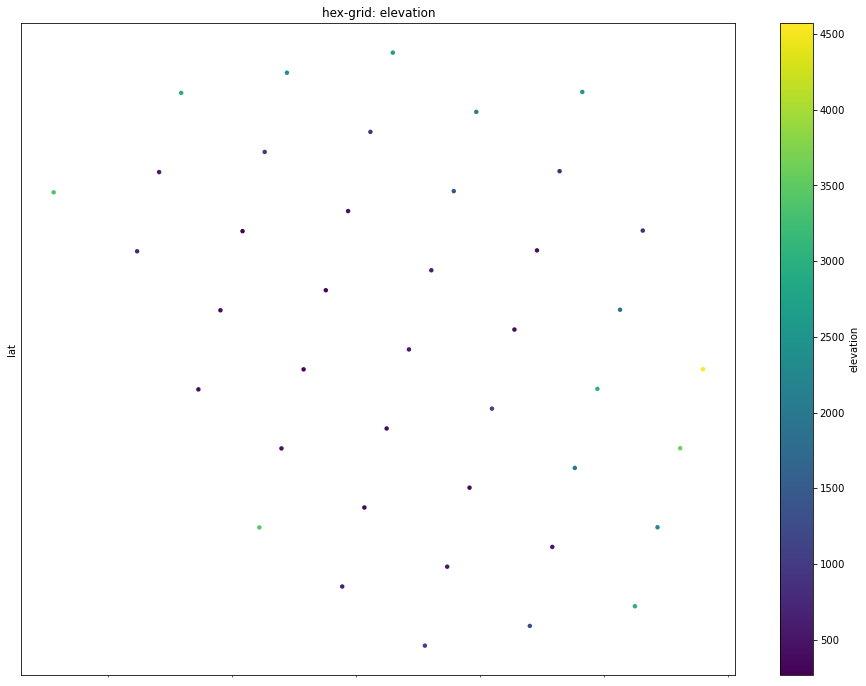

In [80]:
APERTURE_SIZE = 6
hex_col = 'hex'+str(APERTURE_SIZE)

# find hexs containing the points
df[hex_col] = df.apply(lambda x: h3.geo_to_h3(x.lat,x.lng,APERTURE_SIZE),1)

#miau = list(df.apply(lambda x: h3.geo_to_h3(x.lat,x.lng,APERTURE_SIZE),1))
# calculate elevation average per hex
df_dem = df.groupby(hex_col)['elevation'].mean().to_frame('elevation').reset_index()

#find center of hex for visualization
df_dem['lat'] = df_dem[hex_col].apply(lambda x: h3.h3_to_geo(x)[0])
df_dem['lng'] = df_dem[hex_col].apply(lambda x: h3.h3_to_geo(x)[1])

# pltot the hexs
plot_scatter(df_dem, metric_col='elevation', marker='o')
plt.title('hex-grid: elevation');

In [81]:
df_dem

,hex6,elevation,lat,lng
0,8612c1a6fffffff,3368.336997,51.140905,-114.344125
1,8612cc897ffffff,2285.311274,50.907825,-113.857079
2,8612cc8b7ffffff,3613.146531,50.962829,-113.838775
3,8612cc997ffffff,1853.876957,51.059204,-113.887304
4,8612cc99fffffff,4571.945821,51.017865,-113.820416
5,8612cc9b7ffffff,793.276912,51.114292,-113.868974
6,8612ccc07ffffff,3446.725011,50.907694,-114.178198
7,8612ccc0fffffff,655.287064,50.866584,-114.111398
8,8612ccc27ffffff,419.880873,50.962685,-114.160395
9,8612ccc2fffffff,361.124054,50.921555,-114.093510


In [82]:
hexDFDEM = df_dem.drop_duplicates(subset=[hex_col])

In [83]:
result = [x for x in hexDFDEM[hex_col]]

In [84]:
dem=visualize_hexagons(result)

In [87]:
from shapely.geometry import Polygon

polList =[]
for p in dem:
    for t in p:
        pol=[]
        for x in t:
            for c in x:
                cc=(c[1],c[0])
                pol.append(cc)
        polList.append(Polygon(pol))

In [88]:
gdfDEM = geopandas.GeoDataFrame(
    hexDFDEM, geometry=polList, crs="EPSG:4326")

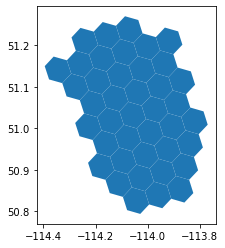

In [89]:
gdfDEM.plot()

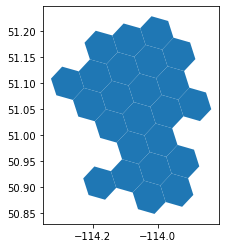

In [93]:
gdfHexs[0].plot()

In [95]:
gdfHexs[0].dtypes

Ward             object
Resident        float64
Male            float64
Female          float64
Dwelling        float64
Household       float64
Employed        float64
Pre_school        int64
Ownership       float64
Age_0_4           int64
Age_5_14          int64
Age_15_19         int64
Age_20_24         int64
Age_25_34         int64
Age_35_44         int64
Age_45_54         int64
Age_55_64         int64
Age_65_74         int64
Age_75_           int64
F20k_           float64
F20_40k         float64
F40_60k         float64
F60_80k         float64
F80_100k        float64
F100_125k       float64
F125_150k       float64
F150_200k       float64
F200k_          float64
Citizen         float64
Immigrant       float64
Economic        float64
Family            int64
Refugees        float64
Other             int64
Top1_Count       object
Top2_Count       object
Top3_Count       object
Top4_Count       object
Top5_Count       object
Avg_income      float64
geometry       geometry
index_right     

In [100]:
len(gdfHexs[0])

24

In [101]:
len(df_dem)

41

In [122]:
dfu = gdfHexs[0].merge(df_dem)
dfu

,Ward,Resident,Male,Female,Dwelling,Household,Employed,Pre_school,Ownership,Age_0_4,...,Top3_Count,Top4_Count,Top5_Count,Avg_income,geometry,index_right,hex6,lat,lng,elevation
0,WARD 11,82636.0,40280.0,42356.0,36800.0,45465.0,42125.0,5902,22800.0,4887,...,China,United States,India,73171.8,"POLYGON ((-114.05927 50.94450, -114.02497 50.9...",5,8612ccd57ffffff,50.976558,-114.075568,413.248029
1,WARD 9,76533.0,38922.0,37611.0,37174.0,37490.0,41935.0,5934,20182.0,5133,...,United Kingdom,China,Ethiopia,45782.0,"POLYGON ((-114.07391 51.06367, -114.10825 51.0...",12,8612ccd77ffffff,51.031592,-114.057573,548.407013
2,WARD 9,76533.0,38922.0,37611.0,37174.0,37490.0,41935.0,5934,20182.0,5133,...,United Kingdom,China,Ethiopia,45782.0,"POLYGON ((-114.02497 50.96744, -113.97438 50.9...",6,8612ccd47ffffff,50.990378,-113.990629,1108.295519
3,WARD 2,94011.0,47052.0,46959.0,32970.0,27355.0,47733.0,8566,26941.0,6956,...,Philippines,Hong Kong,Pakistan,46090.8,"POLYGON ((-114.15746 51.13692, -114.12308 51.1...",13,8612ea68fffffff,51.168999,-114.173920,964.088484
4,WARD 1,87565.0,43306.0,44259.0,34063.0,33570.0,42282.0,6628,24113.0,5390,...,Philippines,India,United States,61786.0,"POLYGON ((-114.22608 51.09087, -114.24257 51.1...",9,8612ccd37ffffff,51.099882,-114.276817,757.683985
5,WARD 1,87565.0,43306.0,44259.0,34063.0,33570.0,42282.0,6628,24113.0,5390,...,Philippines,India,United States,61786.0,"POLYGON ((-114.22608 51.09087, -114.17535 51.0...",2,8612ccd27ffffff,51.113892,-114.191798,265.279495
6,WARD 1,87565.0,43306.0,44259.0,34063.0,33570.0,42282.0,6628,24113.0,5390,...,Philippines,India,United States,61786.0,"POLYGON ((-114.07391 51.06367, -114.09028 51.0...",20,8612ccd2fffffff,51.072763,-114.124629,357.229809
7,WARD 4,85707.0,43111.0,42596.0,33152.0,38530.0,43914.0,6122,22906.0,5015,...,Philippines,United Kingdom,India,57275.4,"POLYGON ((-114.15746 51.13692, -114.14103 51.1...",10,8612ea6d7ffffff,51.127850,-114.106665,464.032434
8,WARD 4,85707.0,43111.0,42596.0,33152.0,38530.0,43914.0,6122,22906.0,5015,...,Philippines,United Kingdom,India,57275.4,"POLYGON ((-114.09028 51.09576, -114.07391 51.0...",23,8612ea6dfffffff,51.086658,-114.039523,624.459179
9,WARD 14,80409.0,40151.0,40258.0,30920.0,31670.0,41096.0,6238,24742.0,5026,...,China,India,United States,66163.5,"POLYGON ((-114.01051 50.84833, -113.97626 50.8...",8,8612ccc77ffffff,50.880383,-114.026736,537.880693


In [102]:
hexDFDEM = dfu.drop_duplicates(subset=[hex_col])

In [103]:
result = [x for x in hexDFDEM[hex_col]]

In [104]:
dem=visualize_hexagons(result)

In [105]:
from shapely.geometry import Polygon

polList =[]
for p in dem:
    for t in p:
        pol=[]
        for x in t:
            for c in x:
                cc=(c[1],c[0])
                pol.append(cc)
        polList.append(Polygon(pol))

In [106]:
gdfDEM = geopandas.GeoDataFrame(
    hexDFDEM, geometry=polList, crs="EPSG:4326")

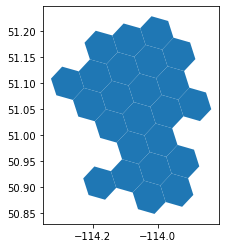

In [107]:
gdfDEM.plot()